In [1]:
from neo4j import GraphDatabase

def get_shortest_path(driver):
    # Define the Cypher query
    twonodes = '''
    MATCH (A1:Article)
    RETURN A1
    ORDER BY RAND()
    LIMIT 2
    '''

    # Execute the query and save the node titles
    with driver.session() as session:
        result = session.run(twonodes)
        titles = []
        for record in result:
            title = record['A1']['title']
            titles.append(title)

        # Find the shortest path between the two nodes
        path_query = '''
        MATCH (A1:Article {title: "'''+titles[0]+'''"})
        MATCH (A2:Article {title: "'''+titles[1]+'''"})
        MATCH A = shortestPath((A1)-[:LINKS_TO*..100000]->(A2))
        RETURN A
        '''
        result = session.run(path_query)
        record = result.single()
        if record is not None:
            path_nodes = record[0].nodes
            num_nodes = len(path_nodes)
            return (titles[0], titles[1], num_nodes-1)
        else:
            return (titles[0], titles[1], 0)


In [1]:
import csv
with open('path.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['Title 1', 'Title 2', 'Number of Nodes'])

In [5]:
uri = "bolt://localhost:7687"
user = "neo4j"
password = "12345678"
driver = GraphDatabase.driver(uri, auth=(user, password))

import csv
for x in range(100000):
    try:
        result = get_shortest_path(driver)
        title1, title2, num_nodes = result
        print(f"The shortest path between {title1} and {title2} contains {num_nodes} nodes")
        with open('path.csv', mode='a',newline='') as file:
            writer = csv.writer(file)
            writer.writerow([title1, title2, num_nodes])
    except Exception as e:
        continue


The shortest path between juan isidro ortea y kennedy and oreské, michalovce district contains 0 nodes
The shortest path between mars loves venus and hants and dorset amateur rowing association contains 6 nodes
The shortest path between pepa y pepe and polish national league contains 5 nodes
The shortest path between partido republicano federal socialista and geelong rangers contains 0 nodes
The shortest path between arquivo público de pernambuco and licania micrantha contains 0 nodes
The shortest path between diplomate of national board  and nikola čuturilo contains 0 nodes
The shortest path between cobbia and jiangsu province delegation to the 20th national congress of the chinese communist party contains 0 nodes
The shortest path between zapateado and hyoscyamine (6s)-dioxygenase contains 0 nodes
The shortest path between mia slama and saurauia elmeri contains 0 nodes
The shortest path between south african music awards of 2010 and 1924 akron pros season contains 0 nodes
The shortes

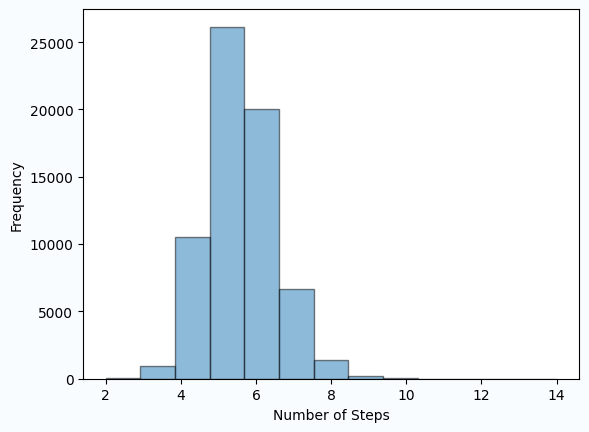

In [26]:
import csv
import matplotlib.pyplot as plt

# Read the data from the CSV file
with open('Outputs/path.csv', 'r') as f:
    reader = csv.reader(f)
    data = [row for row in reader][1:]

# Extract the number of nodes from each row of data
nodes = [int(row[2]) for row in data if int(row[2]) != 0 and int(row[2]) < 15]

# Create a histogram of the number of nodes
plt.rcParams['figure.facecolor'] = '#f9fcffff'
plt.hist(nodes, bins=13, alpha=0.5, edgecolor='black')

# Set the title and axis labels
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')

# Display the histogram
plt.show()


In [28]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Read the data from the CSV file
with open('Outputs/path.csv', 'r') as f:
    reader = csv.reader(f)
    data = [row for row in reader][1:]

# Extract the number of nodes from each row of data, ignoring zeros
nodes = [int(row[2]) for row in data if int(row[2]) != 0]

# Count the number of zeros and calculate the percentage of rows that were zero
num_zeros = len(data) - len(nodes)
percent_zeros = (num_zeros / len(data)) * 100

# Calculate the five-number summary
minimum = np.min(nodes)
q1 = np.percentile(nodes, 25)
median = np.median(nodes)
q3 = np.percentile(nodes, 75)
maximum = np.max(nodes)
mean = np.mean(nodes)

# Calculate the 90% confidence interval
n = len(nodes)
t = stats.t.ppf(1 - (1 - 0.99) / 2, n - 1)
std_error = np.std(nodes, ddof=1) / np.sqrt(n)
lower_ci, upper_ci = stats.t.interval(0.99, n - 1, loc=np.mean(nodes), scale=std_error)

# Print the results
print("Minimum:", minimum)
print("First quartile:", q1)
print("Median:", median)
print("Mean:", mean)
print("Third quartile:", q3)
print("Maximum:", maximum)
print("Percentage of No Path Found:", percent_zeros)
print("99% Confidence Interval: ({:.3f}, {:.3f})".format(lower_ci, upper_ci))


Minimum: 2
First quartile: 5.0
Median: 5.0
Mean: 5.406489156955158
Third quartile: 6.0
Maximum: 93
Percentage of No Path Found: 68.66580243220271
99% Confidence Interval: (5.395, 5.418)
